# **Tensorboard & Callbacks**

## **Library import**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.config.experimental import list_physical_devices, set_virtual_device_configuration, VirtualDeviceConfiguration

In [2]:
gpus = list_physical_devices('GPU')
set_virtual_device_configuration(gpus[0], [VirtualDeviceConfiguration(memory_limit=1000)])
print(len(gpus), "Physical GPUs")

1 Physical GPUs


## **Data**

(60000, 28, 28)

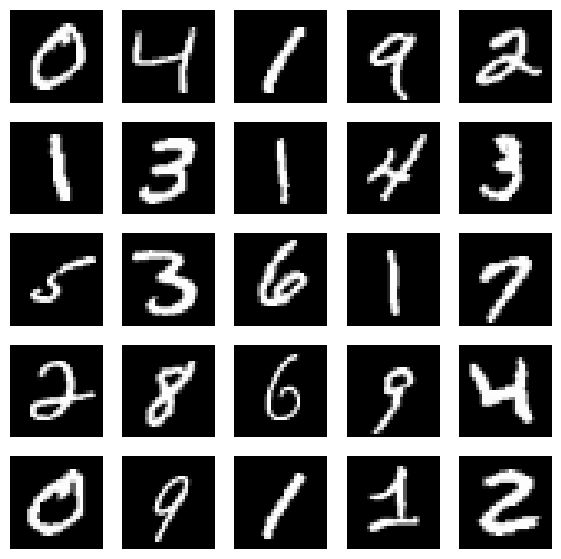

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train / 255
X_test = X_test / 255

plt.figure(figsize=(7,7))
x = 1
for i in range(5):
    for j in range(5):
        plt.subplot(5,5,x)
        plt.imshow(X_train[x], cmap="gray");
        plt.axis("off")
        x += 1
        
X_train.shape

## **Compile & Fit Model**

### **Simple network**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


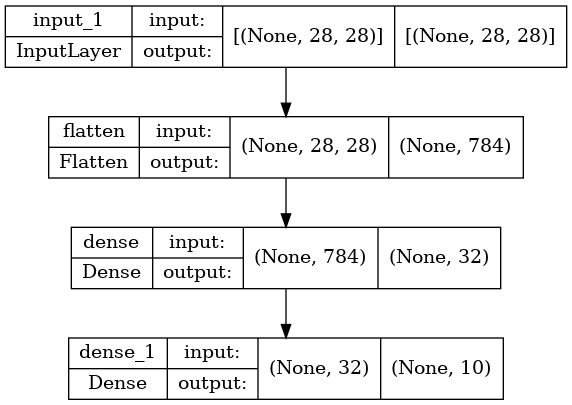

In [4]:
model = Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes=True)

In [5]:
history = model.fit(X_train, y_train, 
                    validation_data = (X_test, y_test),
                    batch_size=16, epochs=5)

Epoch 1/5
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3874 - accuracy: 0.8946 - val_loss: 0.2171 - val_accuracy: 0.9396
Epoch 2/5
3750/3750 [==============================] - 11s 3ms/step - loss: 0.1990 - accuracy: 0.9436 - val_loss: 0.1777 - val_accuracy: 0.9478
Epoch 3/5
3750/3750 [==============================] - 8s 2ms/step - loss: 0.1591 - accuracy: 0.9551 - val_loss: 0.1497 - val_accuracy: 0.9553
Epoch 4/5
3750/3750 [==============================] - 6s 2ms/step - loss: 0.1347 - accuracy: 0.9611 - val_loss: 0.1346 - val_accuracy: 0.9597
Epoch 5/5
3750/3750 [==============================] - 7s 2ms/step - loss: 0.1174 - accuracy: 0.9660 - val_loss: 0.1267 - val_accuracy: 0.9629


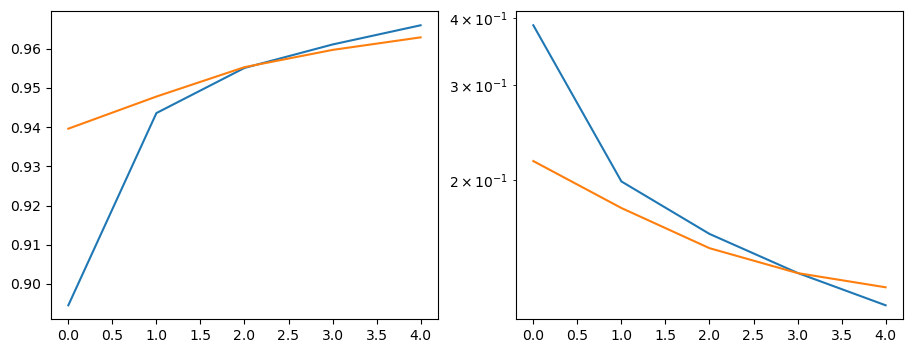

In [6]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);
plt.yscale("log")

### **Bigger network**

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


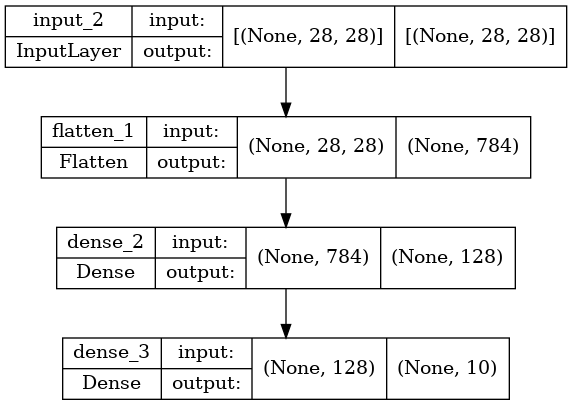

In [7]:
model = Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes=True)

In [8]:
history = model.fit(X_train, y_train, 
                    validation_data = (X_test, y_test),
                    batch_size=16, epochs=5)

Epoch 1/5
3750/3750 [==============================] - 7s 2ms/step - loss: 0.2800 - accuracy: 0.9221 - val_loss: 0.1521 - val_accuracy: 0.9561
Epoch 2/5
3750/3750 [==============================] - 7s 2ms/step - loss: 0.1266 - accuracy: 0.9632 - val_loss: 0.1139 - val_accuracy: 0.9656
Epoch 3/5
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0859 - accuracy: 0.9744 - val_loss: 0.0921 - val_accuracy: 0.9714
Epoch 4/5
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0652 - accuracy: 0.9807 - val_loss: 0.0804 - val_accuracy: 0.9739
Epoch 5/5
3750/3750 [==============================] - 9s 2ms/step - loss: 0.0516 - accuracy: 0.9844 - val_loss: 0.0790 - val_accuracy: 0.9767


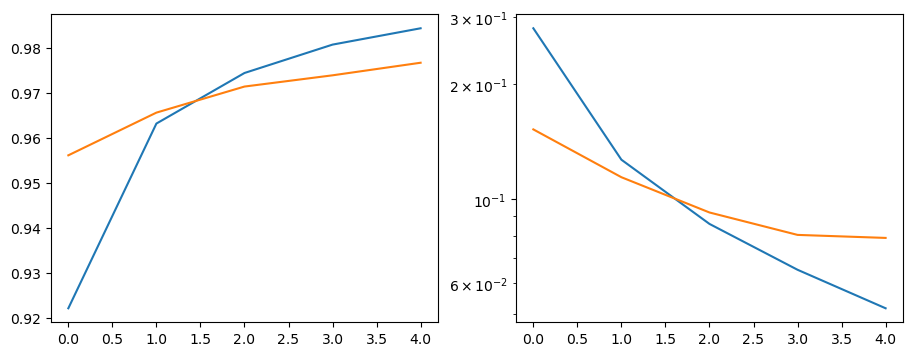

In [9]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);
plt.yscale("log")

### **Convolutional layer**

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        160       
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 10)                250890    
                                                                 
Total params: 251,050
Trainable params: 251,050
Non-trainable params: 0
_________________________________________________________________


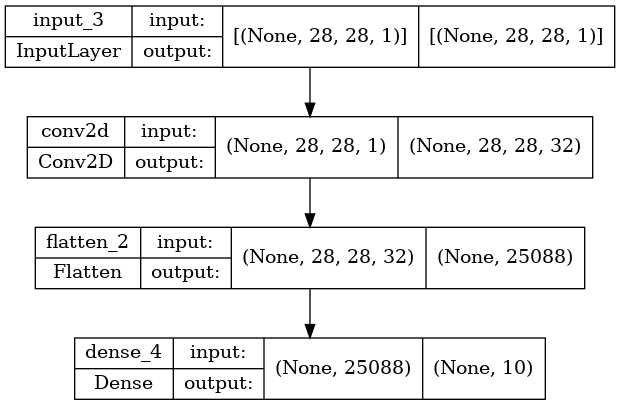

In [10]:
model = Sequential()
model.add(Input((28,28,1)))
model.add(Conv2D(32, (2,2), padding="same", activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes=True)

In [11]:
X_train_conv = X_train.reshape(*X_train.shape,1)
X_test_conv = X_test.reshape(*X_test.shape,1)

history = model.fit(X_train_conv, y_train, 
                    validation_data = (X_test_conv, y_test),
                    batch_size=16, epochs=5)

Epoch 1/5
3750/3750 [==============================] - 14s 3ms/step - loss: 0.2439 - accuracy: 0.9313 - val_loss: 0.1267 - val_accuracy: 0.9645
Epoch 2/5
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0963 - accuracy: 0.9734 - val_loss: 0.0811 - val_accuracy: 0.9764
Epoch 3/5
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0625 - accuracy: 0.9824 - val_loss: 0.0752 - val_accuracy: 0.9754
Epoch 4/5
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0473 - accuracy: 0.9864 - val_loss: 0.0745 - val_accuracy: 0.9768
Epoch 5/5
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0385 - accuracy: 0.9888 - val_loss: 0.0733 - val_accuracy: 0.9779


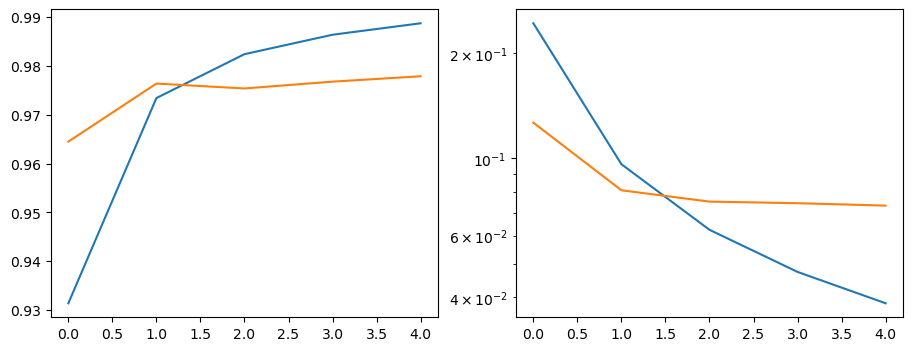

In [12]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);
plt.yscale("log")

## **Tensorboard**

https://www.tensorflow.org/tensorboard

https://keras.io/api/callbacks/tensorboard/

In [4]:
from tensorflow.keras.callbacks import TensorBoard

In [5]:
callbacks = [TensorBoard(log_dir="logs/name", update_freq="epoch")]

!tensorboard --logdir "logs"

In [6]:
callbacks = [TensorBoard(log_dir="logs/dense_32", update_freq="epoch")]

model = Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data = (X_test, y_test),
          batch_size=16, epochs=10,
          callbacks=callbacks)

Epoch 1/10
3750/3750 [==============================] - 7s 2ms/step - loss: 2.4205 - accuracy: 0.5586 - val_loss: 0.9973 - val_accuracy: 0.7343
Epoch 2/10
3750/3750 [==============================] - 7s 2ms/step - loss: 0.8379 - accuracy: 0.7730 - val_loss: 0.6694 - val_accuracy: 0.8159
Epoch 3/10
3750/3750 [==============================] - 6s 2ms/step - loss: 0.5798 - accuracy: 0.8515 - val_loss: 0.5143 - val_accuracy: 0.8820
Epoch 4/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.4308 - accuracy: 0.8933 - val_loss: 0.4555 - val_accuracy: 0.9026
Epoch 5/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.3381 - accuracy: 0.9151 - val_loss: 0.3696 - val_accuracy: 0.9273
Epoch 6/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.2885 - accuracy: 0.9268 - val_loss: 0.3303 - val_accuracy: 0.9289
Epoch 7/10
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2593 - accuracy: 0.9329 - val_loss: 0.3045 - val_accuracy:

In [7]:
callbacks = [TensorBoard(log_dir="logs/dense_128", update_freq="epoch")]

model = Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data = (X_test, y_test),
          batch_size=16, epochs=10,
          callbacks=callbacks)

Epoch 1/10
3750/3750 [==============================] - 6s 1ms/step - loss: 2.8710 - accuracy: 0.8656 - val_loss: 0.5482 - val_accuracy: 0.8905
Epoch 2/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.4153 - accuracy: 0.9114 - val_loss: 0.3623 - val_accuracy: 0.9181
Epoch 3/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.2690 - accuracy: 0.9351 - val_loss: 0.2847 - val_accuracy: 0.9311
Epoch 4/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.2110 - accuracy: 0.9463 - val_loss: 0.3302 - val_accuracy: 0.9323
Epoch 5/10
3750/3750 [==============================] - 5s 1ms/step - loss: 0.1869 - accuracy: 0.9520 - val_loss: 0.2699 - val_accuracy: 0.9418
Epoch 6/10
3750/3750 [==============================] - 6s 2ms/step - loss: 0.1651 - accuracy: 0.9584 - val_loss: 0.2719 - val_accuracy: 0.9453
Epoch 7/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.1566 - accuracy: 0.9608 - val_loss: 0.2289 - val_accuracy:

In [8]:
callbacks = [TensorBoard(log_dir="logs/conv2d_32_2x2", update_freq="epoch")]

model = Sequential()
model.add(Input((28,28,1)))
model.add(Conv2D(32, (2,2), padding="same", activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train_conv = X_train.reshape(*X_train.shape,1)
X_test_conv = X_test.reshape(*X_test.shape,1)

history = model.fit(X_train_conv, y_train, 
                    validation_data = (X_test_conv, y_test),
                    batch_size=16, epochs=10,
                    callbacks=callbacks)

Epoch 1/10
3750/3750 [==============================] - 14s 3ms/step - loss: 0.8156 - accuracy: 0.9338 - val_loss: 0.1243 - val_accuracy: 0.9634
Epoch 2/10
3750/3750 [==============================] - 13s 3ms/step - loss: 0.0970 - accuracy: 0.9702 - val_loss: 0.1183 - val_accuracy: 0.9659
Epoch 3/10
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0602 - accuracy: 0.9803 - val_loss: 0.1075 - val_accuracy: 0.9703
Epoch 4/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0371 - accuracy: 0.9874 - val_loss: 0.1358 - val_accuracy: 0.9687
Epoch 5/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0252 - accuracy: 0.9915 - val_loss: 0.1568 - val_accuracy: 0.9690
Epoch 6/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0203 - accuracy: 0.9930 - val_loss: 0.1566 - val_accuracy: 0.9701
Epoch 7/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0144 - accuracy: 0.9952 - val_loss: 0.1857 - val_ac

## **Images**

https://www.tensorflow.org/tensorboard/image_summaries

In [9]:
import io

def plot(img, pred):
    fig = plt.figure(figsize=(5,5))
    plt.title(pred)
    plt.axis("off")
    plt.imshow(img, cmap=plt.cm.binary)
    return fig

def plot_to_image(figure):
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close(figure)
    buf.seek(0)
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    image = tf.expand_dims(image, 0)
    return image

In [10]:
logdir = "logs/conv2d_32_2x2/validation"
with tf.summary.create_file_writer(logdir).as_default():
    for i in range(10):
        img = X_test[i]
        y_pred = model.predict(img.reshape(-1,28,28,1))
        y_pred = np.argmax(y_pred)
        
        tf.summary.image("10 training data examples", 
                         plot_to_image(plot(img, y_pred)), max_outputs=25, step=i)

### **only wrong images**

In [11]:
def plot(img, pred, true):
    fig = plt.figure(figsize=(5,5))
    plt.title(f"{pred} (true {true})")
    plt.axis("off")
    plt.imshow(img, cmap=plt.cm.binary)
    return fig

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
wrong = (y_pred == y_test) == False

with tf.summary.create_file_writer(logdir).as_default():
    for i in range(10):
        img = X_test[wrong][i]
        true = y_test[wrong][i]
        pred = y_pred[wrong][i]
        tf.summary.image("10 mistakenly classified images", 
                         plot_to_image(plot(img, pred, true)), max_outputs=25, step=i)

### **Confusion matrix**

In [12]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_pred, y_test):
    fig = plt.figure(figsize=(6,6))
    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm)

    for i in range(10):
        for j in range(10):
            plt.text(i,j,cm[i,j], ha="center", va="center")

    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.xticks(np.arange(10))
    plt.yticks(np.arange(10))

    return fig

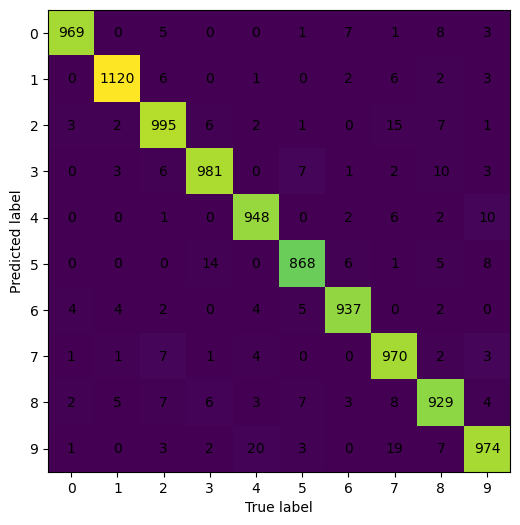

In [13]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

plot_confusion_matrix(y_pred, y_test);

In [14]:
with tf.summary.create_file_writer(logdir).as_default():
    tf.summary.image("Confusion matrix", plot_to_image(plot_confusion_matrix(y_pred, y_test)), step=0)

## **Callbacks**

https://keras.io/api/callbacks/

### **Reduce learning rate**

https://keras.io/api/callbacks/reduce_lr_on_plateau/

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau

In [15]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [16]:
callbacks = [TensorBoard(log_dir="logs/conv2d_reduce_lr", update_freq="epoch"),
             ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3,
                               min_lr=0.0, mode="min", verbose=1)]

model = Sequential()
model.add(Input((28,28,1)))
model.add(Conv2D(32, (2,2), padding="same", activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train_conv = X_train.reshape(*X_train.shape,1)
X_test_conv = X_test.reshape(*X_test.shape,1)

history = model.fit(X_train_conv, y_train, 
                    validation_data = (X_test_conv, y_test),
                    batch_size=16, epochs=10,
                    callbacks=callbacks)

Epoch 1/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.8505 - accuracy: 0.9327 - val_loss: 0.1261 - val_accuracy: 0.9652 - lr: 5.0000e-04
Epoch 2/10
3750/3750 [==============================] - 13s 3ms/step - loss: 0.0940 - accuracy: 0.9717 - val_loss: 0.1186 - val_accuracy: 0.9663 - lr: 5.0000e-04
Epoch 3/10
3750/3750 [==============================] - 13s 4ms/step - loss: 0.0614 - accuracy: 0.9808 - val_loss: 0.1127 - val_accuracy: 0.9706 - lr: 5.0000e-04
Epoch 4/10
3738/3750 [============================>.] - ETA: 0s - loss: 0.0395 - accuracy: 0.9867
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
3750/3750 [==============================] - 13s 3ms/step - loss: 0.0395 - accuracy: 0.9867 - val_loss: 0.1275 - val_accuracy: 0.9693 - lr: 5.0000e-04
Epoch 5/10
3750/3750 [==============================] - 13s 3ms/step - loss: 0.0123 - accuracy: 0.9960 - val_loss: 0.1205 - val_accuracy: 0.9740 - lr: 1.0000e-04
Epoch 6/10
3750/3750 [====

### **LambdaCallback**

In [17]:
from tensorflow.keras.callbacks import LambdaCallback

In [18]:
def batchOutput(batch, logs):
    tf.summary.scalar('batch_accuracy', data=logs['accuracy'], step=batch)
    return batch

callbacks = [TensorBoard(log_dir="logs/write_per_batch", update_freq="batch"),
             LambdaCallback(on_batch_end=batchOutput,)]

model = Sequential()
model.add(Input((28,28,1)))
model.add(Conv2D(32, (2,2), padding="same", activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train_conv = X_train.reshape(*X_train.shape,1)
X_test_conv = X_test.reshape(*X_test.shape,1)

model.fit(X_train_conv, y_train,
          validation_data = (X_test_conv, y_test),
          batch_size=16, epochs=1,
          callbacks=callbacks)

3750/3750 [==============================] - 21s 5ms/step - loss: 0.6126 - accuracy: 0.9377 - val_loss: 0.1347 - val_accuracy: 0.9621


## **Tuning HyperParams**

https://www.tensorflow.org/tensorboard/hyperparameter_tuning_with_hparams

In [20]:
from tensorboard.plugins.hparams import api as hp

filters = hp.HParam('filters', hp.Discrete([16, 32]))
learning_rate = hp.HParam('learning_rate', hp.Discrete([1e-3, 1e-4, 1e-5]))
dropout = hp.HParam('dropout', hp.Discrete([0.0, 0.2]))

In [21]:
def get_model(filters, dropout, learning_rate):
    model = Sequential()
    model.add(Input((28,28,1)))
    model.add(Conv2D(filters, (2,2), padding="same", activation='relu'))
    model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

def train_test_model(hparams):
    model = get_model(hparams[filters], hparams[dropout], hparams[learning_rate])

    name = "hp_{0}_{1}_{2}".format(hparams[filters], hparams[dropout], hparams[learning_rate])
    logdir = "logs/hparam_tuning/" + name

    callbacks = [TensorBoard(log_dir=logdir, update_freq="epoch"),
                 hp.KerasCallback(logdir, hparams)]
    
    model.fit(X_train_conv, y_train, 
              batch_size=16, epochs=10, 
              callbacks=callbacks)
    _, accuracy = model.evaluate(X_test_conv, y_test)
    
    with tf.summary.create_file_writer(logdir).as_default():
        tf.summary.scalar("accuracy", accuracy, step=0)

In [22]:
for N in filters.domain.values:
    for LR in learning_rate.domain.values:
        for D in dropout.domain.values:
            hparams = {filters : N,
                       dropout : D,
                       learning_rate : LR}

            print({h.name: hparams[h] for h in hparams})
            train_test_model(hparams)

{'filters': 16, 'dropout': 0.0, 'learning_rate': 1e-05}
Epoch 1/10
3750/3750 [==============================] - 10s 2ms/step - loss: 4.2404 - accuracy: 0.7621
Epoch 2/10
3750/3750 [==============================] - 9s 2ms/step - loss: 1.2505 - accuracy: 0.8869
Epoch 3/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.8157 - accuracy: 0.9082
Epoch 4/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.5867 - accuracy: 0.9223
Epoch 5/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.4398 - accuracy: 0.9342
Epoch 6/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.3431 - accuracy: 0.9428
Epoch 7/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.2794 - accuracy: 0.9501
Epoch 8/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.2334 - accuracy: 0.9548
Epoch 9/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.1977 - accuracy: 0.9596
Epoch 10/10
313/313 [====

### **Keras tuner**

https://keras.io/keras_tuner/

In [23]:
import keras_tuner

In [24]:
def build_model(hp):
    model = Sequential()
    model.add(Input((28,28,1)))
    model.add(Conv2D(hp.Choice('filters', [8, 16, 32]), (2,2), padding="same", activation='relu'))
    model.add(Dropout(hp.Float('dropout', min_value=0, max_value=0.3, step=0.05)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [5e-5, 1e-4, 5e-4, 1e-3, 5e-3])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [45]:
tuner = keras_tuner.RandomSearch(build_model, 
                                 objective='val_loss', 
                                 max_trials=12, 
                                 directory="logs/keras_tuner")

logdir = "logs/keras_tuner"
callbacks = [TensorBoard(log_dir=logdir, update_freq="epoch")]

tuner.search(X_train_conv, y_train, 
             validation_data=(X_test_conv, y_test),
             batch_size=16, epochs=5,
             callbacks=callbacks)

Trial 12 Complete [00h 01m 19s]
val_loss: 0.13242514431476593

Best val_loss So Far: 0.10553618520498276
Total elapsed time: 00h 13m 07s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [35]:
tuner.results_summary()

Results summary
Results in logs/keras_tuner/untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
filters: 16
dropout: 0.0
learning_rate: 0.001
Score: 0.11634071916341782
Trial summary
Hyperparameters:
filters: 32
dropout: 0.25
learning_rate: 0.0001
Score: 0.13555504381656647
Trial summary
Hyperparameters:
filters: 32
dropout: 0.0
learning_rate: 0.0001
Score: 0.15819093585014343
Trial summary
Hyperparameters:
filters: 16
dropout: 0.15000000000000002
learning_rate: 0.005
Score: 0.2359447032213211
Trial summary
Hyperparameters:
filters: 16
dropout: 0.2
learning_rate: 0.005
Score: 0.24571342766284943


In [36]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
filters (Choice)
{'default': 8, 'conditions': [], 'values': [8, 16, 32], 'ordered': True}
dropout (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.3, 'step': 0.05, 'sampling': None}
learning_rate (Choice)
{'default': 5e-05, 'conditions': [], 'values': [5e-05, 0.0001, 0.0005, 0.001, 0.005], 'ordered': True}


In [44]:
best_model = tuner.get_best_models()[0]

tuner.get_best_hyperparameters()[0].values

{'filters': 16, 'dropout': 0.0, 'learning_rate': 0.001}

In [43]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        80        
                                                                 
 dropout (Dropout)           (None, 28, 28, 16)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 10)                125450    
                                                                 
Total params: 125,530
Trainable params: 125,530
Non-trainable params: 0
_________________________________________________________________


### **Autokeras**

https://autokeras.com/

## **Tensorboard inline**

In [47]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs/

## **Tensorboard dev**

https://tensorboard.dev/

In [ ]:
!tensorboard dev upload --logdir logs --name "MNIST Digits"

In [ ]:
!tensorboard dev delete --experiment_id 05yx3Mn2TXKqbiE1LwqSWQ